In [2]:
import scipy.integrate as integrate
import scipy.integrate as quad
from scipy.integrate import quad
from numpy import sqrt, pi
from sympy import *
init_printing()
from IPython.display import display

In [3]:
x = symbols('x')
func = lambda x: exp(x)

In [4]:
def T(n,x):
    if(n == 0):
        return 1
    elif (n == 1):
        return x
    return 2*x *T(n-1,x) - T(n-2,x)

In [7]:
def C(foo,n):
    fun = func
    if n == 0:
        return integrate((1/pi)*fun(x)/(1-x**2)**0.5,(x,-1,1)).evalf(6)
    else:
        return integrate((2/pi)*fun(x)*T(n,x)/(1-x**2)**0.5,(x,-1,1)).evalf(6)

In [92]:
quad(func,0,1)[0]


In [94]:
def dis(f1,n):
    f = IndexedBase("f")
    i = Idx('i')
    ans = 0
    display(f[n])
    print("=")
    if n == 0:
        ans = C(f1,n)*T(n,x)
        display(ans)
    else:
        for j in range(n+1):
            ans = ans + C(f1,j)*T(j,x)
        display(ans)

In [81]:
def Chebyshev(f1,n):
    print('\nn\tCn\n')
    for i in range(n):
        if(i == 0):
            for j in range(11):
                if(j == 1 or j == 3 or j == 5 or j == 10):
                    print('%d\t%0.12f\n' %(j, C(f1,j)))

        elif(i == 1 or i == 3 or i == 5 or i == 10):
            if(i == 1):
                dis(f1,1)
            elif(i == 3):
                dis(f1,3)
            elif(i == 5):
                dis(f1,5)
            elif(i == 10):
                dis(f1,10)
                break            

In [82]:
Chebyshev(func,11)


n	Cn

1	1.130318164825

3	0.044336847961

5	0.000542926369

10	0.000000000551



=


=


=


=


In [8]:
def ChebyshevUse(f1,n):
    
    ans = 0
    for j in range(n,-1,-1):
        ans = ans + C(f1,j)*T(j,x)
        
    return ans

In [56]:
def Y2(f1,ind,xv):
    expr = ChebyshevUse(f1,ind)
    return expr.subs(x,xv)

In [11]:
import numpy as np
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt


In [12]:
Y110_ = X110_Y110_Spline(X110_)
xx = np.array([-1,-0.5,0,0.5,1]) 
yy = []
yy.extend([func(-1), func(-0.5),func(0),func(0.5), func(1)])
yy = np.array(yy)
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
y2 = []
y2.extend([Y2(func,0,-1),Y2(func,0,-0.5),Y2(func,0,0),Y2(func,0,0.5),Y2(func,0,1)])
y2 = np.array(y2)
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [13]:
y21 = []
y21.extend([Y2(func,1,-1),Y2(func,1,-0.5),Y2(func,1,0),Y2(func,1,0.5),Y2(func,1,1)])
y21 = np.array(y21)

In [14]:
y23 = []
y23.extend([Y2(func,3,-1),Y2(func,3,-0.5),Y2(func,3,0),Y2(func,3,0.5),Y2(func,3,1)])
y23 = np.array(y23)

In [15]:
y25 = []
y25.extend([Y2(func,5,-1),Y2(func,5,-0.5),Y2(func,5,0),Y2(func,5,0.5),Y2(func,5,1)])
y25 = np.array(y25)

In [16]:
y210 = []
y210.extend([Y2(func,10,-1),Y2(func,10,-0.5),Y2(func,10,0),Y2(func,10,0.5),Y2(func,10,1)])
y210 = np.array(y210)

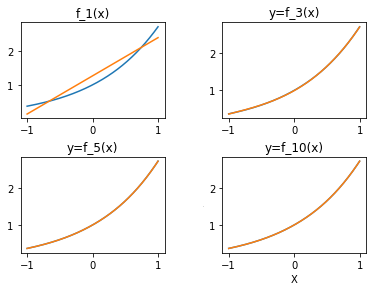

In [50]:
# Dataset
X_Y_Spline = make_interp_spline(xx, yy)
X1_Y1_Spline = make_interp_spline(xx, y2)
X11_Y11_Spline = make_interp_spline(xx, y21)
X13_Y13_Spline = make_interp_spline(xx, y23)
X15_Y15_Spline = make_interp_spline(xx, y25)
X110_Y110_Spline = make_interp_spline(xx, y210)




# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(xx.min(), xx.max(), 500)
Y_ = X_Y_Spline(X_)

X1_ = np.linspace(xx.min(), xx.max(), 500)
Y1_ = X1_Y1_Spline(X1_)

X11_ = np.linspace(xx.min(), xx.max(), 500)
Y11_ = X11_Y11_Spline(X11_)

X13_ = np.linspace(xx.min(), xx.max(), 500)
Y13_ = X13_Y13_Spline(X13_)

X15_ = np.linspace(xx.min(), xx.max(), 500)
Y15_ = X15_Y15_Spline(X15_)

X110_ = np.linspace(xx.min(), xx.max(), 500)
Y110_ = X110_Y110_Spline(X110_)

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)
 
# Plotting the Graph
axis[0, 0].plot(X_, Y_)
axis[0, 0].set_title('f_1(x)')
#plt.plot(X1_, Y1_,label='y=f_0(x)')
axis[0, 0].plot(X11_, Y11_)

axis[0, 1].plot(X_, Y_)
axis[0, 1].plot(X13_, Y13_)
axis[0, 1].set_title('y=f_3(x)')
axis[1, 0].plot(X_,Y_)
axis[1, 0].plot(X15_, Y15_)
axis[1, 0].set_title('y=f_5(x)')

axis[1, 1].plot(X_,Y_)
axis[1, 1].plot(X110_, Y110_)
axis[1, 1].set_title('y=f_10(x)')

plt.xlabel("X",fontsize=10)
plt.ylabel("Y",fontsize=0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

In [18]:
# ABSOLUTE ERROR F_0(x)

ry2 = []
ry2.extend([-func(-1)+Y2(func,0,-1),-func(-0.5)+Y2(func,0,-0.5),-func(0)+Y2(func,0,0),-func(0.5)+Y2(func,0,0.5),-func(1)+Y2(func,0,1)])
ry2 = np.array(ry2)

In [19]:
# ERROR FOR F_1(X)
ry21 = []
ry21.extend([-func(-1)+Y2(func,1,-1),-func(-0.5)+Y2(func,1,-0.5),-func(0)+Y2(func,1,0),-func(0.5)+Y2(func,1,0.5),-func(1)+Y2(func,1,1)])
ry21 = np.array(ry21)

In [20]:
#ERROR FOR F_3(x)
def ChebyshevUse(f1,n):
ry23 = []
ry23.extend([-func(-1)+Y2(func,3,-1),-func(-0.5)+Y2(func,3,-0.5),-func(0)+Y2(func,3,0),-func(0.5)+Y2(func,3,0.5),-func(1)+Y2(func,3,1)])
ry23 = np.array(ry23)

In [21]:
#ERROR FOR F_5(x)
ry25 = []
ry25.extend([-func(-1)+Y2(func,5,-1),-func(-0.5)+Y2(func,5,-0.5),-func(0)+Y2(func,5,0),-func(0.5)+Y2(func,5,0.5),-func(1)+Y2(func,5,1)])
ry25 = np.array(ry25)

In [22]:
#ERROR FOR F_10(X)
ry210 = []
ry210.extend([-func(-1)+Y2(func,10,-1),-func(-0.5)+Y2(func,10,-0.5),-func(0)+Y2(func,10,0),-func(0.5)+Y2(func,10,0.5),-func(1)+Y2(func,10,1)])
ry210 = np.array(ry210)

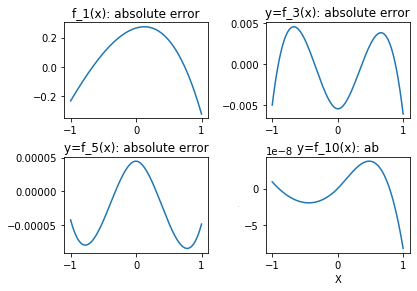

In [90]:
X1_Y1_Spline = make_interp_spline(xx, ry2)
X11_Y11_Spline = make_interp_spline(xx, ry21)
X13_Y13_Spline = make_interp_spline(xx, ry23)
X15_Y15_Spline = make_interp_spline(xx, ry25)
X110_Y110_Spline = make_interp_spline(xx, ry210)

# Returns evenly spaced numbers
# over a specified interval.

X1_ = np.linspace(xx.min(), xx.max(), 500)
Y1_ = X1_Y1_Spline(X1_)

X11_ = np.linspace(xx.min(), xx.max(), 500)
Y11_ = X11_Y11_Spline(X11_)

X13_ = np.linspace(xx.min(), xx.max(), 500)
Y13_ = X13_Y13_Spline(X13_)

X15_ = np.linspace(xx.min(), xx.max(), 500)
Y15_ = X15_Y15_Spline(X15_)

X110_ = np.linspace(xx.min(), xx.max(), 500)
Y110_ = X110_Y110_Spline(X110_)
 
# Plotting the Graph
figure, axis = plt.subplots(2, 2)
 
axis[0, 0].plot(X11_, Y11_)
axis[0, 0].set_title('f_1(x): absolute error')
#plt.plot(X1_, Y1_,label='y=f_0(x)')

axis[0, 1].plot(X13_, Y13_)
axis[0, 1].set_title('y=f_3(x): absolute error')

axis[1, 0].plot(X15_, Y15_)
axis[1, 0].set_title('y=f_5(x): absolute error')

axis[1, 1].plot(X110_, Y110_)
axis[1, 1].set_title('y=f_10(x): ab')
axis[1,1].set_label('hj')

plt.xlabel("X",fontsize=10)
plt.ylabel("Y",fontsize=0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()